# Урок 1. Алгоритм линейной регрессии. Градиентный спуск

<h1>План занятия<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-1">Линейная регрессия</a></span><ul class="toc-item"><li><span><a href="#Уравнение-прямой" data-toc-modified-id="Уравнение-прямой-1.1">Уравнение прямой</a></span></li><li><span><a href="#Уравнение-линейной-регрессии" data-toc-modified-id="Уравнение-линейной-регрессии-1.2">Уравнение линейной регрессии</a></span></li></ul></li><li><span><a href="#Метод-наименьших-квадратов" data-toc-modified-id="Метод-наименьших-квадратов-2">Метод наименьших квадратов</a></span></li><li><span><a href="#Градиентный-спуск-(gradient-descent)" data-toc-modified-id="Градиентный-спуск-(gradient-descent)-3">Градиентный спуск (gradient descent)</a></span></li><li><span><a href="#Домашние-задания" data-toc-modified-id="Домашние-задания-4">Домашние задания</a></span></li></ul></div>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

### Линейная регрессия

<img src='img/linear_regression.png' width=400 align='left'>

#### Уравнение прямой

<div style='float:left;'><img src='img/slope-intercept-form.png' width=250 align='left'></img></div><div style='float:left;'><img src='img\slope-intercept.png' width=300 align='center'></img></div>

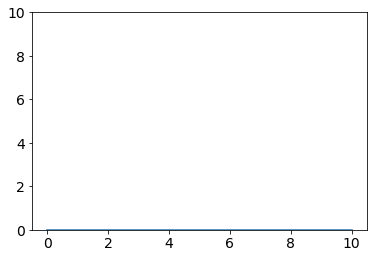

In [46]:
from ipywidgets import interactive

def f(m, b):
    plt.figure(2)
    x = np.linspace(0, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(0, 10)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-10, 10, 1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

#### Уравнение линейной регрессии

$${y}_i = w_0 + w_1\cdot x_{i}+\epsilon_i, \text{ for } i \in [1,n]$$
$$\hat{y}_i = \hat w_0\cdot 1 + \hat w_1\cdot x_{i}, \text{ for } i \in [1,n]$$

$$\vec{y}=X\vec{w},$$


$$\text{где }\vec{y} = \begin{pmatrix}
\hat y_{1}\\ 
\vdots\\ 
\hat y_{n}
\end{pmatrix}, 
X = \begin{pmatrix}
1 & x_{1}\\ 
\vdots & \vdots\\ 
1 & x_{n}
\end{pmatrix},
\vec{w} = \begin{pmatrix}
\hat w_{0}\\ 
\hat w_{1}
\end{pmatrix}
$$

In [8]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T # стаж репетитора
X.shape

(10, 2)

In [9]:
X

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [10]:
# средний балл ЕГЭ (целевая переменная)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

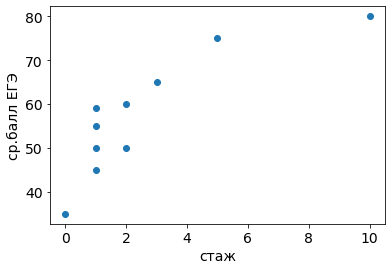

In [11]:
plt.scatter(X[:,1], y)
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

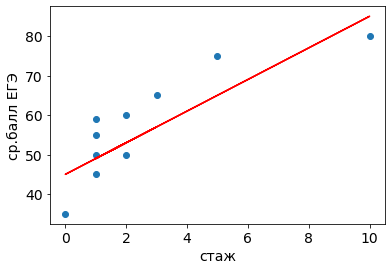

In [12]:
# y = m * x + b
m = 4
b = 45
plt.scatter(X[:,1], y);
plt.plot(X[:,1],  m * X[:,1] + b, color='red')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ');

In [13]:
y_pred1 = 45 + 4 * X[:,1] 
y_pred2 = 40 + 7 * X[:,1]

In [14]:
y_pred1

array([49, 49, 53, 49, 57, 45, 65, 85, 49, 53])

In [15]:
y_pred2

array([ 47,  47,  54,  47,  61,  40,  75, 110,  47,  54])

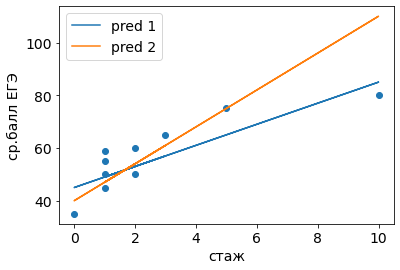

In [16]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], y_pred1, label='pred 1')
plt.plot(X[:,1], y_pred2, label='pred 2')
plt.xlabel('стаж')
plt.ylabel('ср.балл ЕГЭ')
plt.legend();

In [17]:
err1 = np.mean(y - y_pred1)
err2 = np.mean(y - y_pred2)
err1, err2

(2.0, -0.8)

In [18]:
# mae - mean absolute error
mae_1 = np.mean(np.abs(y - y_pred1))
mae_2 = np.mean(np.abs(y - y_pred2))
mae_1, mae_2

(6.4, 7.4)

In [19]:
# mse - mean squared error
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(50.0, 121.4)

### Метод наименьших квадратов

Нормальное уравнение линейной регрессии
$$\vec{w} = (X^{T}X)^{-1}X^{T}\vec{y}$$

In [49]:
X.T @ X

array([[ 10,  26],
       [ 26, 146]])

In [21]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([47.23214286,  3.91071429])

In [22]:
w1 = np.sum((y - np.mean(y)) * (X[:,1] - X[:,1].mean())) / np.sum((X[:,1] - X[:,1].mean()) ** 2)
w0 = np.mean(y) - w1 * X[:,1].mean()
w0, w1

(47.23214285714286, 3.910714285714285)

In [23]:
w_ = [40, 5]
print(X @ w_)
print(np.dot(w_, X.T))
print(np.dot(X, w_))
print(w_[0] * X[:,0] + w_[1] * X[:,1])
print(np.sum(w_ * X, axis=1))

[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]
[45 45 50 45 55 40 65 90 45 50]


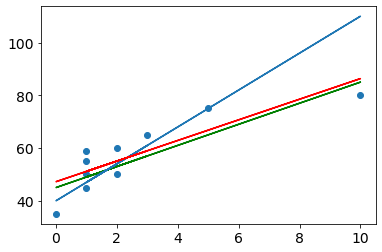

In [24]:
plt.scatter(X[:,1], y)
plt.plot(X[:,1], 45 + X[:,1] * 4, color='g')
plt.plot(X[:,1], 40 + X[:,1] * 7)
plt.plot(X[:,1], w[0] + w[1] * X[:,1], color='red');

In [25]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [26]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(6.4, 50.0)

In [27]:
y_pred3 = w[0] + w[1] * X[:,1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [28]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(6.182142857142858, 45.93749999999999)

### Градиентный спуск (gradient descent)

<img src='img/grad_desent.gif' width=500 align='center'></img>

$$L(w)=\frac{1}{n}\sum^{n}_{i=1}\big({y_{pred}}_i-y_{i}\big)^{2}=\frac{1}{n}\sum^{n}_{i=1}\big((w_0\cdot x_{i0}+w_1\cdot x_{i1})-y_{i}\big)^{2}\rightarrow \underset{w}{\text{min}}$$
$$w_j\leftarrow w_j-\alpha\frac{\partial}{\partial w_j}L(w)$$
$$\frac{\partial L(w)}{\partial w_j}=\frac{1}{n} 2\sum^{n}_{i=1}x_{ij}\Big(\sum^{m}_{j=0}(w_jx_{ij})-y_i\Big)$$
$$\vec{w}=\vec{w}-\alpha \frac{2}{n}X^T(X\vec{w}-\vec{y}) $$


In [29]:
n = 10
alpha = 1e-3
w = np.array([1, 0.5])
grad = 1/n * 2 * np.sum(X.T * (np.sum(w * X, axis=1) - y), axis=1)
grad = 1/n * 2 * np.dot(X.T, (np.dot(w, X.T) - y))
w, w - alpha * grad

(array([1. , 0.5]), array([1.1102, 0.84  ]))

### Домашние задания

1. Подберите скорость обучения (alpha) и количество итераций для градиентного спуска (до совпадения ответов с результатами МНК). Как влияют друг на друга эти два параметра?

In [41]:
n = X.shape[0]
alpha = 1e-2
w = np.array([1, 0.5])

for i in range(2000+1):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986

0 [2.102 3.9  ] 3173.15
100 [31.88770806  6.74418155] 175.19445858001848
200 [41.83683774  4.90699865] 61.9177717428135
300 [45.33508261  4.26102097] 47.913169919666764
400 [46.56511152  4.03388672] 46.18175564810758
500 [46.99760587  3.95402334] 45.96769776787538
600 [47.14967657  3.92594232] 45.941233404700036
700 [47.20314662  3.91606866] 45.93796156758049
800 [47.2219474   3.91259695] 45.937557064435396
900 [47.228558    3.91137626] 45.937507054979434
1000 [47.23088237  3.91094704] 45.937500872219886
1100 [47.23169965  3.91079613] 45.937500107834126
1200 [47.23198702  3.91074306] 45.93750001333172
1300 [47.23208806  3.9107244 ] 45.93750000164824
1400 [47.23212359  3.91071784] 45.93750000020376
1500 [47.23213608  3.91071554] 45.93750000002521
1600 [47.23214048  3.91071473] 45.93750000000313
1700 [47.23214202  3.91071444] 45.937500000000384
1800 [47.23214256  3.91071434] 45.93750000000005
1900 [47.23214275  3.9107143 ] 45.93750000000001
2000 [47.23214282  3.91071429] 45.9374999999999

alpha = 1e-2, количество итераций - 2000
Чем выше скорость, тем меньше итераций потребуется для обучения. Но если задать слишком большую скорость, модель может просто не достичь требуемой точности.

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [58]:
w = np.array([1, 0.5])
alpha = 1e-2
for i in range(2401):
    y_pred = np.dot(w, X.T)
    err = calc_mse(y, y_pred)
    '''for j in range(w.shape[0]):
        w[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y)))'''
    w -= (alpha * (1/n * 2 * np.dot(X.T , (y_pred - y))))
    if i % 400 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [2.102 3.9  ] 3173.15
400 [46.56511152  4.03388672] 46.18175564810758
800 [47.2219474   3.91259695] 45.937557064435396
1200 [47.23198702  3.91074306] 45.93750001333172
1600 [47.23214048  3.91071473] 45.93750000000313
2000 [47.23214282  3.91071429] 45.93749999999999
2400 [47.23214286  3.91071429] 45.937499999999986


*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога. 

Сколько нужно сделать итераций, если установить допустимое отклонение mse в размере $\text{diff}=10^{-6}$, а значение $\alpha=10^{-2}$?

In [97]:
w = np.array([1, 0.5])
diff = 1e-6
alpha = 1e-2
i = 0
while True:
    i += 1
    y_pred = np.dot(w, X.T)
    prev_err, err = err, calc_mse(y, y_pred)
    w -= (alpha * (1/n * 2 * np.dot(X.T , (y_pred - y))))
    if abs(err - prev_err) <= diff:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986
        break


810 [47.22286276  3.91242793] 45.937547277798465


Заметки по матричным вычислениям http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf